In [1]:
############################################ Importing Packages ############################################
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

print("## Packages Loaded!")

## Packages Loaded!


In [2]:
############################################ Functions ############################################
def loadData():
    X_test = pd.read_csv('data/X_test.csv', header=None).as_matrix() ; X_train = pd.read_csv('data/X_train.csv', header=None).as_matrix()
    y_test = pd.read_csv('data/y_test.csv', header=None).as_matrix() ; y_train = pd.read_csv('data/y_train.csv', header=None).as_matrix()

    return X_train, X_test, y_train, y_test

class Kernel(object):
    def __init__(self,*args):
        self.b = args

    def __call__(self,x1,x2):
        dist = np.linalg.norm(x1-x2)
        kern = np.exp( (-1 * (dist**2)) / self.b[0] )
        return kern
    
def getCovariance(K,df):
    cov = np.reshape([K(x1,x2) for x1 in df for x2 in df], (len(df),len(df)))
    return cov


def getPredict(K,xtrain,ytrain,Cov,x1):
    kern = [K(x1,x2) for x2 in xtrain]
    Kern_Cov = np.dot(kern,np.linalg.inv(Cov))
    mean = np.dot(Kern_Cov,ytrain)[0]
    m_temp = np.dot(Kern_Cov,kern)
    Sigma = K(x1,x1) - m_temp
    return x1,mean,Sigma

def initDicts(Pairs):
    dict_sample={}
    for i in range(Pairs):
        dict_sample[i]={}
    return dict_sample

def getRMSE(dict_sample, y):
    RMSE, Sum_Error_Square =[], 0

    for key in dict_sample.keys():
        pred = dict_sample[key]['y']
        merged_df = zip(dict_sample[key]['y'],y[:,0])
        Sum_Error_Square = sum([(x1-x2)**2 for x1,x2 in merged_df])
        rmse = math.sqrt(Sum_Error_Square/len(y))
        RMSE.append(rmse)
        
    RMSE = pd.DataFrame(np.reshape(RMSE,(len(b),10)))
    RMSE.columns = pair_range
    RMSE.index = b

    return RMSE

def getPredList(x,y):
    pred, temp_df, x_updated, y_updated=[], zip(x,y), [], []

    for i,j in temp_df:
        pred.append((i,j))
       
    for i,j in sorted(pred):
        x_updated.append(i)
        y_updated.append(j)
    return x_updated,y_updated
    
def Main(dict_sample,xtrain,xtest,ytrain):
    i=0
    for b,sig2 in pairs:
        
        kern = Kernel(b)
        Cov = getCovariance(kern,xtrain)
        diagonal_Cov = np.diag_indices_from(Cov)
        Cov[diagonal_Cov] = Cov[diagonal_Cov] + sig2
        pred = [getPredict(kern, xtrain, ytrain, Cov, x1) for x1 in xtest]
        dict_sample[i] = {
                            'x':[p[0] for p in pred],
                            'y':[p[1] for p in pred],
                            'sigma':[p[2] for p in pred],
                            'b': b,
                            'sig2': sig2            
                          }
        print("b value: ", b, "sig^2 value: ",sig2)
        i+=1
    print("Done!")    
    return dict_sample

def ModifiedMain(b,sig2,xtrain,ytrain):
    train=xtrain[:,3]
    test=train
    
    kern = Kernel(b)
    Cov = getCovariance(kern,train)
    diagonal_Cov = np.diag_indices_from(Cov)
    Cov[diagonal_Cov] = Cov[diagonal_Cov] + sig2
    pred = [getPredict(kern, train, ytrain, Cov, x1) for x1 in test]
    x = [p[0] for p in pred]
    y = [p[1] for p in pred]
    print("Done!")  
    return x,y
print("## Functions Loaded!")

## Functions Loaded!


In [3]:
X_train, X_test, y_train, y_test= loadData()

In [4]:
print("X train shape: " , X_train.shape)
print("X test shape: " , X_test.shape)
print("y train shape: " , y_train.shape)
print("y test shape: " , y_test.shape)

X train shape:  (350, 7)
X test shape:  (42, 7)
y train shape:  (350, 1)
y test shape:  (42, 1)


In [5]:
pair_range = [round(x * 0.1,2) for x in range(1, 11)]
b = [5, 7, 9, 11, 13, 15]
pairs=[(i,j) for i in b for j in pair_range]

dict_sample = initDicts(len(pairs)) 

In [6]:
############################################ PLOT PART A ############################################
dict_sample = Main(dict_sample,X_train,X_test,y_train)


b value:  5 sig^2 value:  0.1
b value:  5 sig^2 value:  0.2
b value:  5 sig^2 value:  0.3
b value:  5 sig^2 value:  0.4
b value:  5 sig^2 value:  0.5
b value:  5 sig^2 value:  0.6
b value:  5 sig^2 value:  0.7
b value:  5 sig^2 value:  0.8
b value:  5 sig^2 value:  0.9
b value:  5 sig^2 value:  1.0
b value:  7 sig^2 value:  0.1
b value:  7 sig^2 value:  0.2
b value:  7 sig^2 value:  0.3
b value:  7 sig^2 value:  0.4
b value:  7 sig^2 value:  0.5
b value:  7 sig^2 value:  0.6
b value:  7 sig^2 value:  0.7
b value:  7 sig^2 value:  0.8
b value:  7 sig^2 value:  0.9
b value:  7 sig^2 value:  1.0
b value:  9 sig^2 value:  0.1
b value:  9 sig^2 value:  0.2
b value:  9 sig^2 value:  0.3
b value:  9 sig^2 value:  0.4
b value:  9 sig^2 value:  0.5
b value:  9 sig^2 value:  0.6
b value:  9 sig^2 value:  0.7
b value:  9 sig^2 value:  0.8
b value:  9 sig^2 value:  0.9
b value:  9 sig^2 value:  1.0
b value:  11 sig^2 value:  0.1
b value:  11 sig^2 value:  0.2
b value:  11 sig^2 value:  0.3
b value

In [7]:
############################################ PLOT PART B ############################################
RMSE= getRMSE(dict_sample,y_test)
RMSE

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966276,1.933135,1.923420,1.922198,1.924769,1.929213,1.934634,1.940583,1.946820,1.953213
7,1.920163,1.904877,1.908080,1.915902,1.924804,1.933701,1.942254,1.950380,1.958093,1.965438
9,1.897649,1.902519,1.917648,1.932514,1.945699,1.957235,1.967403,1.976492,1.984741,1.992341
11,1.890507,1.914981,1.938849,1.957936,1.973216,1.985764,1.996375,2.005603,2.013835,2.021345
13,1.895849,1.935586,1.964597,1.985502,2.001314,2.013878,2.024310,2.033307,2.041317,2.048642
15,1.909603,1.959549,1.990804,2.011915,2.027370,2.039465,2.049463,2.058105,2.065845,2.072976


Done!


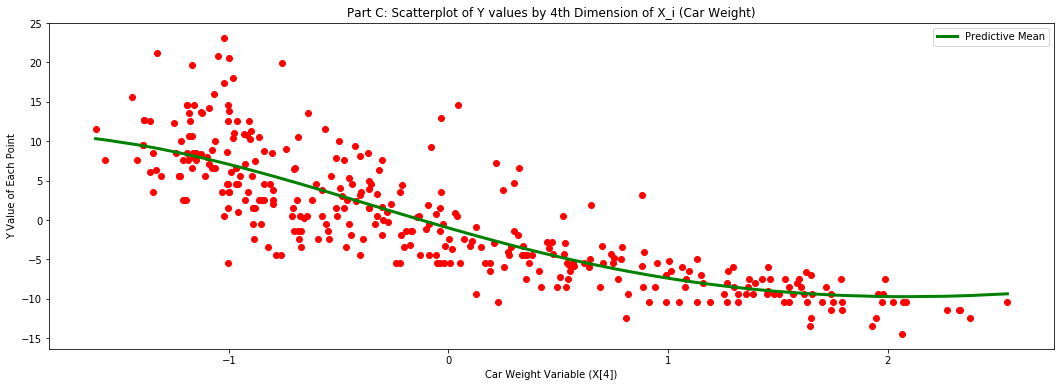

In [8]:
############################################ PLOT PART C ############################################
b=5
sig2=2
x,y=ModifiedMain(b,sig2,X_train,y_train)
x,y = getPredList(x,y)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 6

plot1 = plt.scatter(X_train[:,3], y_train[:,0])
plt.setp(plot1,'color', 'r')
plot2 = plt.plot(x, y,label='Predictive Mean',linewidth=3)
plt.setp(plot2,'color', 'g')

plt.xlabel('Car Weight Variable (X[4])')
plt.ylabel('Y Value of Each Point')
plt.legend()
plt.title("Part C: Scatterplot of Y values by 4th Dimension of X_i (Car Weight)")